In [1]:
# train base model
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

2025-07-08 18:55:03.359739: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
#!ls data/baseline

Negative  Positive


In [2]:
from module.dataloader import create_generators
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='keras.src.trainers.data_adapters.py_dataset_adapter')

data_dir = "data/baseline"
train_gen, val_gen = create_generators(
    data_dir,
    img_size=(224, 224),
    batch_size=16,
    val_split=0.2,
    augment=False
)

# Training pass logic
history = model.fit(
    train_gen,
    epochs=5,
    validation_data=val_gen,
    steps_per_epoch=5,       
    validation_steps=5       
)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6045 - loss: 0.8669 - val_accuracy: 1.0000 - val_loss: 0.0714
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 686ms/step - accuracy: 0.9898 - loss: 0.0906 - val_accuracy: 0.9875 - val_loss: 0.0567
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 691ms/step - accuracy: 0.9700 - loss: 0.0650 - val_accuracy: 0.9875 - val_loss: 0.0199
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 667ms/step - accuracy: 1.0000 - loss: 0.0170 - val_accuracy: 0.9875 - val_loss: 0.0415
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 646ms/step - accuracy: 1.0000 - loss: 0.0199 - val_accuracy: 0.9750 - val_loss: 0.0387


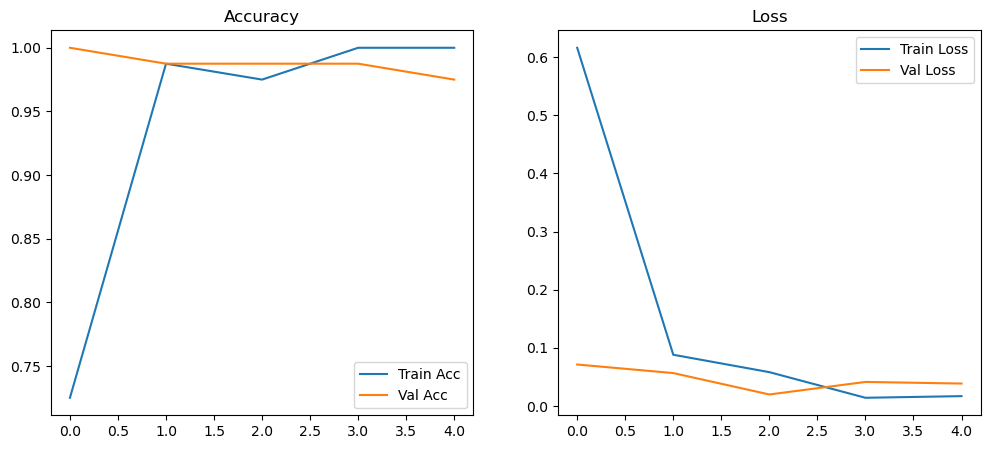

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [4]:
model.save("models/basemodel.keras")

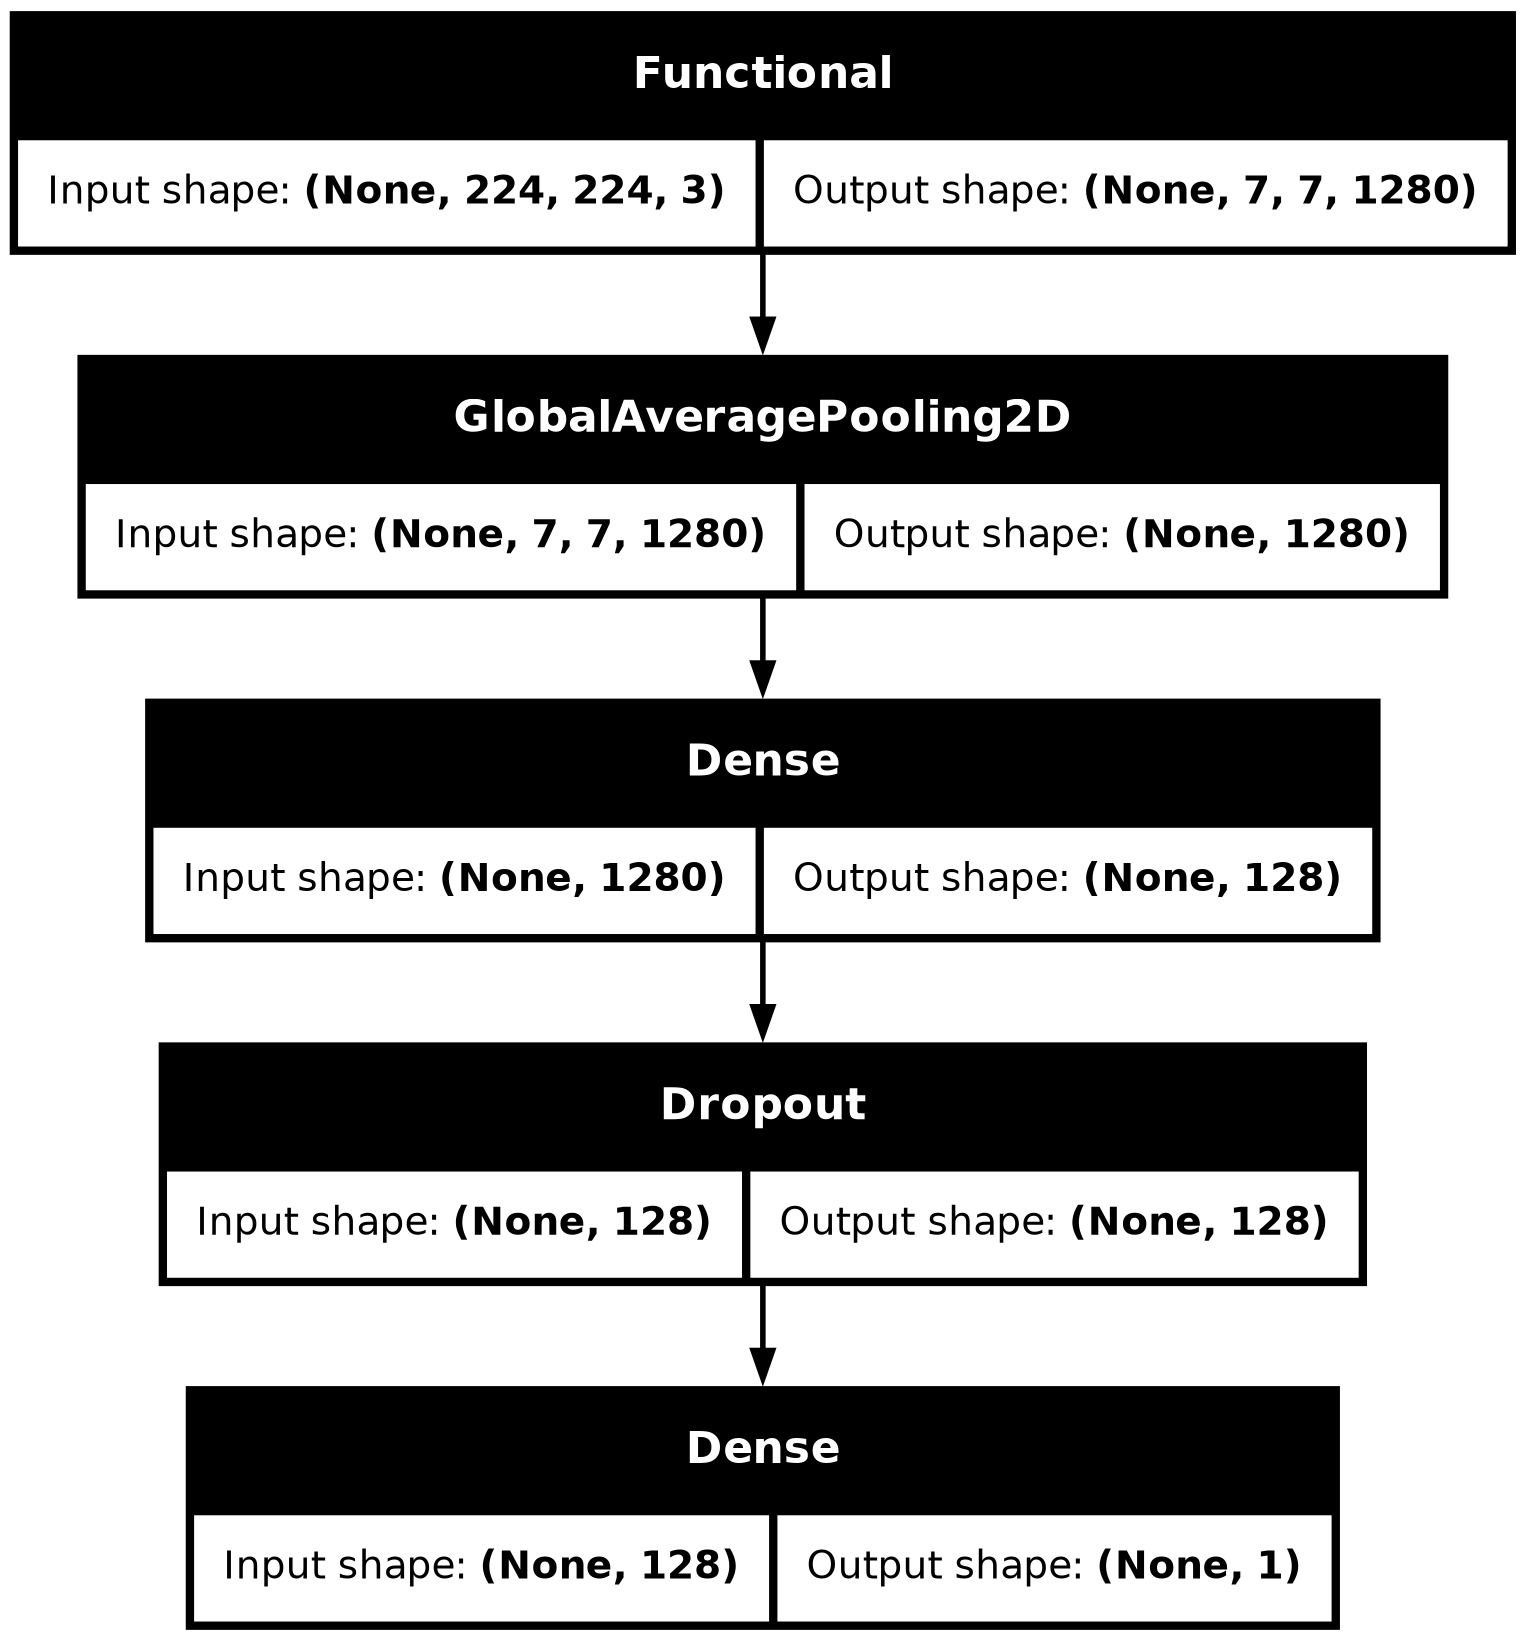

In [5]:
from tensorflow import keras
from IPython.display import Image, display

# Output model architecture
keras.utils.plot_model(model, show_shapes=True, to_file="models/basemodel.png")
display(Image(filename="models/basemodel.png", width=450))  

In [ ]:
# end of base model build